# 利用Python函數繪製圖形
# <strong>利用Python函數繪製圖形</strong>
## 對於一些繪圖前置的資料處理，以及在過程時所遇到的問題進行進行著墨，且盡量採用多個方法或不同的觀察模式去畫同一張圖並觀察極值的結果。
## 主要使用matplotlib.pyplot和numpy的套件繪製

In [2]:
#%% import packages
import matplotlib.pyplot as plt
import numpy as np


## 1. $$f(x) = sin(x) + cos(x)$$ 
### 正弦和餘弦的相加
### x $\in$ (-4 $\pi$, 4 $\pi$)
## 注意事項： 
- ### sin()的函數不能改變np.array的值，要用np.sin() 對其他轉換也一樣 需使用numpy函式庫指令 

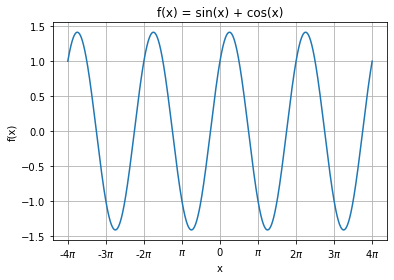

In [4]:
x =  np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x) + np.cos(x)
plt.grid(True)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = sin(x) + cos(x)")
tick = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])*np.pi
ticklabel = ['-4$\pi$', '-3$\pi$', '-2$\pi$', '$\pi$', '0', '$\pi$','2$\pi$','3$\pi$', '4$\pi$']
plt.xticks(tick, ticklabel)
plt.show()

## 2. $$f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$$ 
### x $\in$ (-10, 10)
## 注意事項：
- ### 使用lambda方法將python函數用一行code呈現
- ### 在string前加個r可讓python辨認為regular expression，以順利呈現數學式標題
- ### linewidth調整粗度

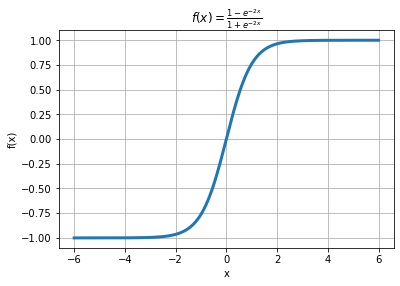

In [3]:
x = np.linspace(-6, 6, 10000)
f = lambda x: (1 - np.exp(-2 * x))/(1 + np.exp(-2 * x))
plt.grid()
plt.plot(x, f(x), linewidth = 3)
plt.title(r"$f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## 3. $f(x) = \sqrt[3]{\frac{4 - x^3}{1 + x^2}}$
### x $\in$ (-10, 3)
### 將x切成幾個分段 慢慢畫出 只在終端機可實現
## 注意事項
- ### 本來想使用np.power()的方法取1/3次方但他實際上是用逼近的方法取到0.3333次方 因此會有nan產生 改用np.cbrt可對負數取1/3次方

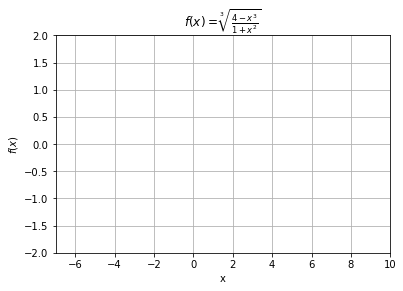

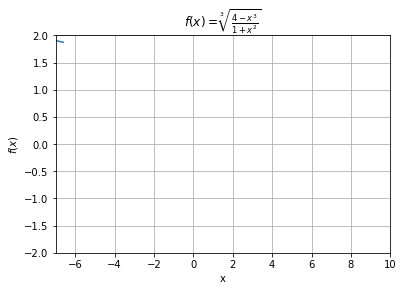

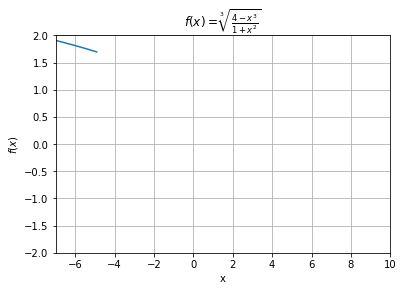

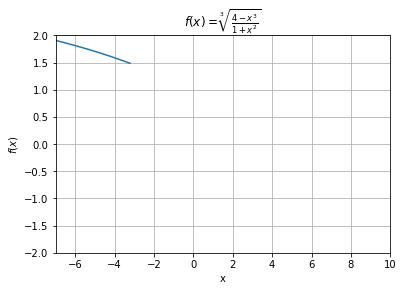

KeyboardInterrupt: 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 7, 1000)
f = lambda x: np.cbrt((4 - x ** 3)/(1 + x ** 2))
## draw the function gradually, only for terminal
for i in range(10):
    partx = x[0: 100 * (i + 1)]
    plt.plot(partx, f(partx), color = "red", linewidth = 3)
    plt.grid(True)
    plt.title(r"$f(x) = \sqrt[3]{\frac{4 - x^3}{1 + x^2}}$")
    plt.xlabel("x")
    plt.ylabel("$f(x)$")
    plt.xlim(-11, 8)
    plt.ylim(-2.5, 2.5)   
    plt.pause(0.3)
plt.show()

## 4. $$f(x) = \frac{1}{x}$$
### x = (-0.05, 0.05)
### 此為一個雙曲線圖形 漸進x軸和y軸
### 以原點為對稱中心
### plt.plot(x1, y1, x2, y2) two lines in a command
## 注意事項
- ### 在繪製時分兩條線畫，原因是x = 0時，值未定義，線條不該連起來，直接畫會發生相連的情況了。 

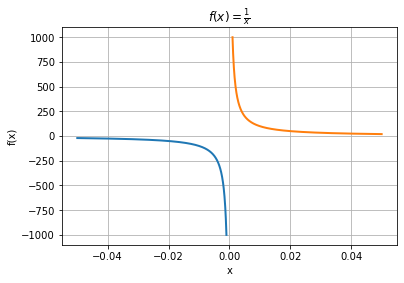

In [5]:
x1 = np.linspace(-0.05, -0.001, 1000)
y1 = 1/x1
x2 = np.linspace(0.001, 0.05, 1000)
y2 = 1/x2
plt.grid()
plt.plot(x1, y1, x2, y2, linewidth= 2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"$f(x) = \frac{1}{x}$")
plt.show()


## 5. $f(x) = \frac{1}{2\sqrt{2 \pi}} e^{-\frac{(x - 1)^2}{8}}$
### x $\in$ (-5, 8)
### 此為鐘形曲線 常態分配 N(1, 4)
### 以x = 1為對稱中心
### 分兩部分呈現 
* #### 1-點直接帶函式畫 
* #### 2-從分布隨機抽樣畫出直方圖驗證是否為理論分布：使用np.random.normal(mu, sigma, n)
### 最後發現sampling結果近似理論值
## 注意事項
- ### 調整透明度alpha可看得更清楚
- ### 加legend可使圖更明白


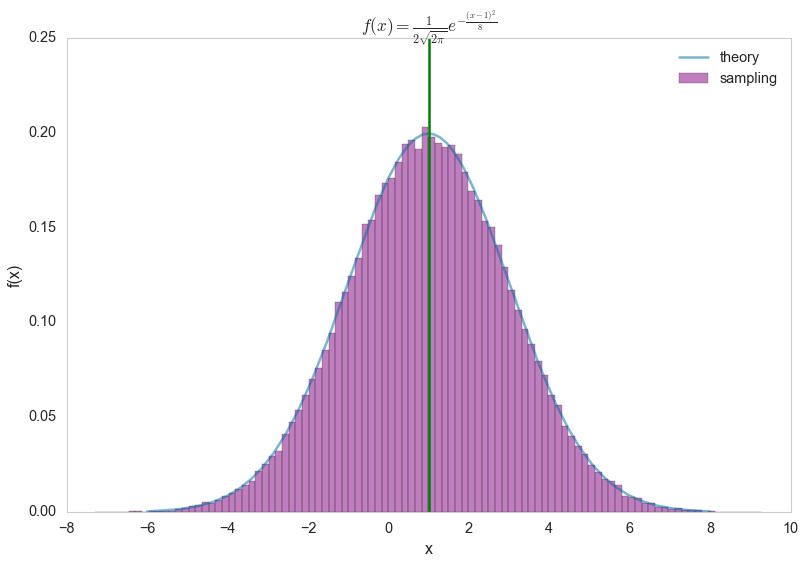

In [41]:
# Part1
x = np.linspace(-6, 8, 1000)
f = lambda x: (1/(2 * np.sqrt(2 * np.pi))) * np.exp((-(x-1)**2)/8)
plt.grid()
plt.plot(x, f(x), alpha = 0.5, label = "theory")

# Part2
mu = 1
variance = 4
# 100000 samples from N(1, 4)  
random_sample = np.random.normal(1, np.sqrt(variance), 100000)
plt.hist(random_sample, bins = 100, color = "purple", density= True, alpha = 0.5, label = "sampling")

# Draw a vetical line
plt.axvline(x = 1, color = "green")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title(r"$f(x) = \frac{1}{2\sqrt{2 \pi}} e^{-\frac{(x - 1)^2}{8}}$")
plt.show()

## 6. $f(x) = \sqrt[3]{x^2}$
### x $\in$ (-100, 100)
### 負數取平方會變正數 也是對x = 0對稱的原因
## 注意事項
- ### 可用plt.annotate(xy, text)加文字敘述在圖上

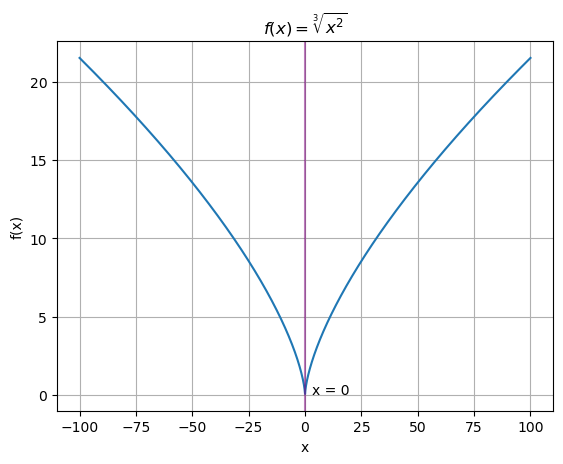

In [33]:
x = np.linspace(-100, 100, 10000)
y = np.power(x**2, 1/3)
plt.grid(True)
plt.plot(x, y)
plt.title(r"$f(x) = \sqrt[3]{x^2}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axvline(x = 0, color = "purple", alpha = 0.5)
plt.annotate(xy = (3, 0), text = "x = 0")
plt.show()


## 7. $f(x) = 2x^3 - x^4$
### 一次微分發現 x = 3/2 有極值 二次微分發現此為凹向下 因此極值為最大值，往x = 3/2 左右各畫3/2單位觀察
### 畫出最大值
## 注意事項
- ### 取最大值時mx會變1x1 nparray改成scalar可以使用.item() method 
- ### .format()裡給的變數會依順序到前面的大括號中，在coding較為方便。

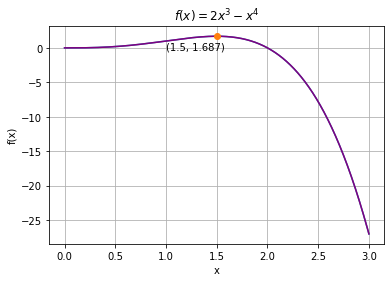

In [5]:
x = np.linspace(-0, 3, 100000)
y = 2 * (x ** 3) - x ** 4
plt.grid()
plt.plot(x, y)
my = np.max(y)
mx = x[y == my]
plt.plot(x, y, color = "purple")
plt.plot(mx, my, "o")
position = "({}, {})".format(np.round(mx.item(), 3), round(my, 3))
plt.annotate(xy = (mx.item() - 0.5, my - 2), text = position)
plt.title(r"$f(x) = 2x^3 - x^4$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


## 8. $f(x) = \frac{lnx}{x^3}$
### x $\in$ (0.5, 1.5)
### 試著將函數下的面積著色 plt.fill_between(x, y1, y2, where, color)
### 此函數 x < 0 沒有函數值


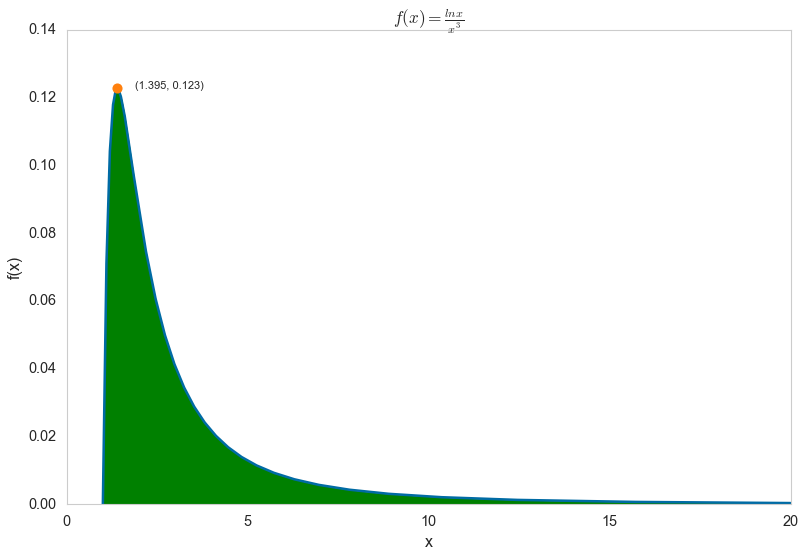

In [44]:
x = np.linspace(1, 20, 10000)
y = np.log(x) / (x ** 3)
my = np.max(y)
mx = x[y == my]
plt.grid()
plt.plot(x, y)
plt.plot(mx, my, "o")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"$f(x) = \frac{lnx}{x^3}$")
position = "({}, {})".format(np.round(mx.item(), 3), round(my, 3))
plt.annotate(xy = (mx + 0.5, my), text = position)

# polygon
g0 = [0] * 10000
plt.fill_between(x, y, g0, y > g0, color = "green")

plt.show()

## 9. $f(x) = 3$
### x $\in$ [1, 5]
### 此為一個常數函數
### 來看看有甚麼背景格式可以換 
### plt.style.use - 使用style
### plt.style.available - 有多少style可用 

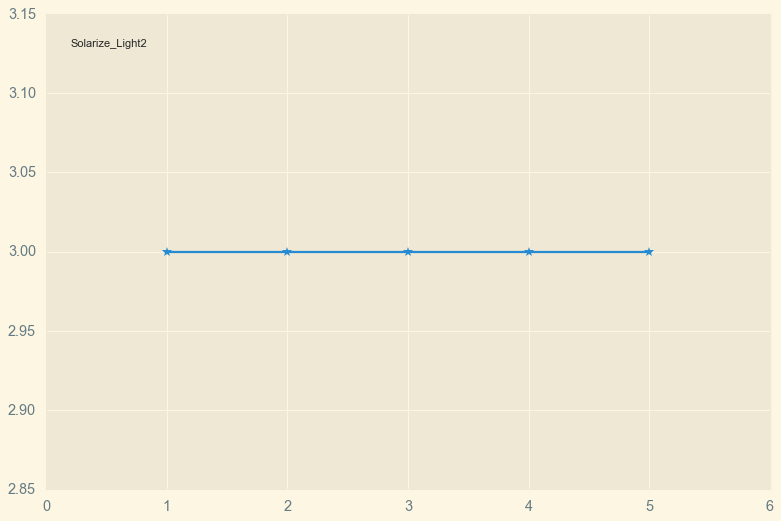

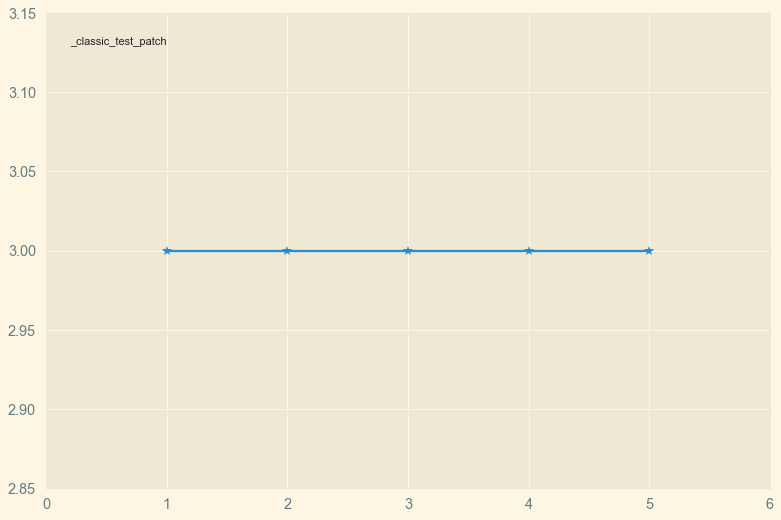

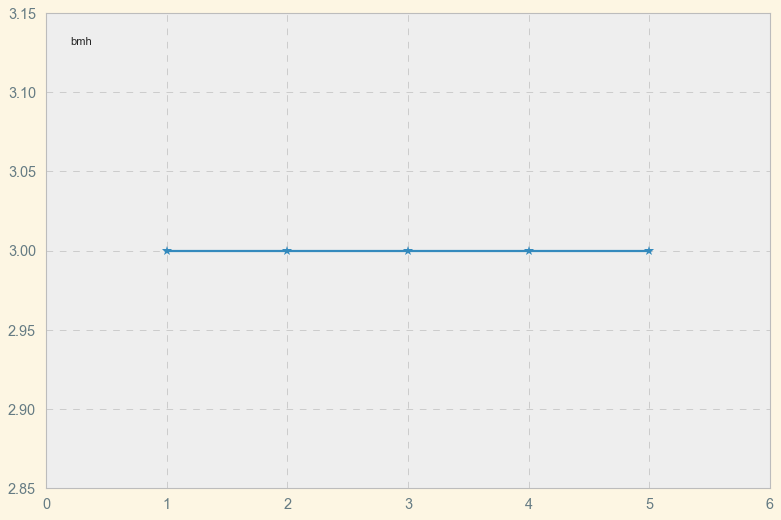

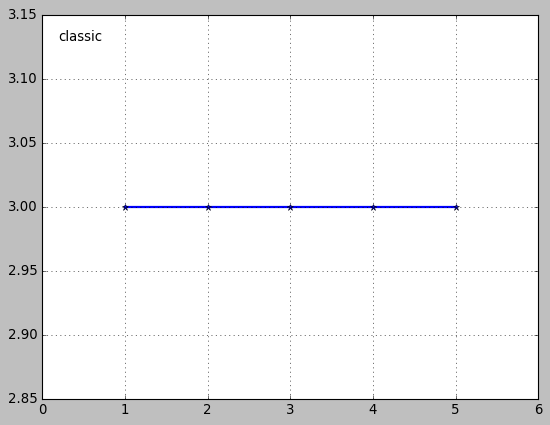

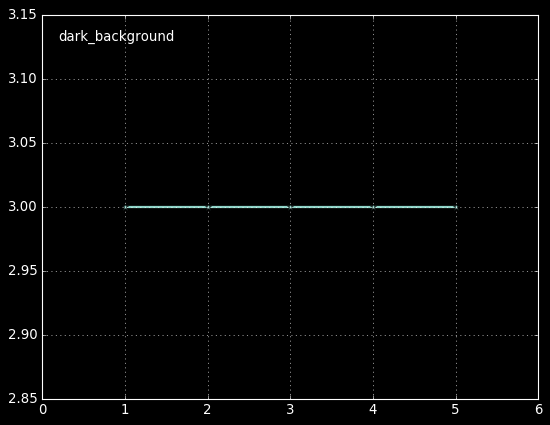

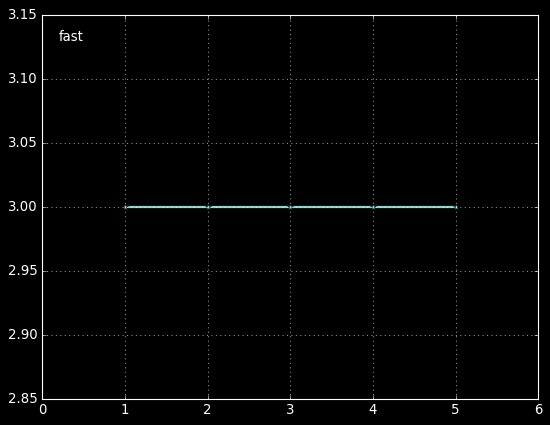

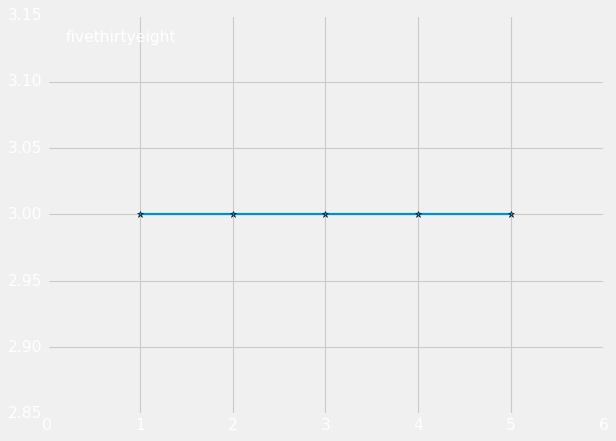

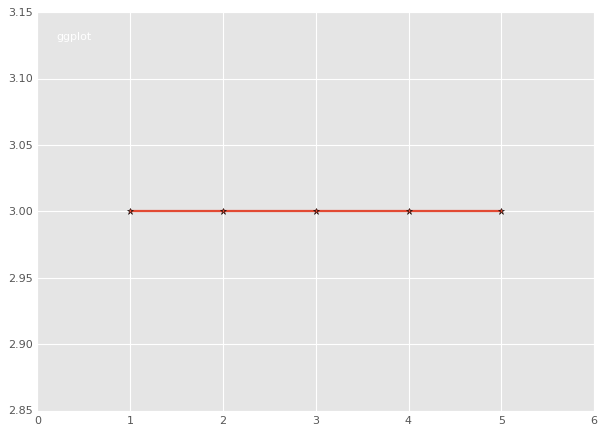

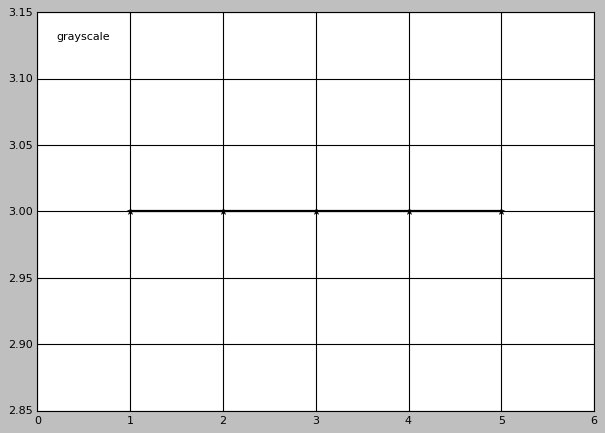

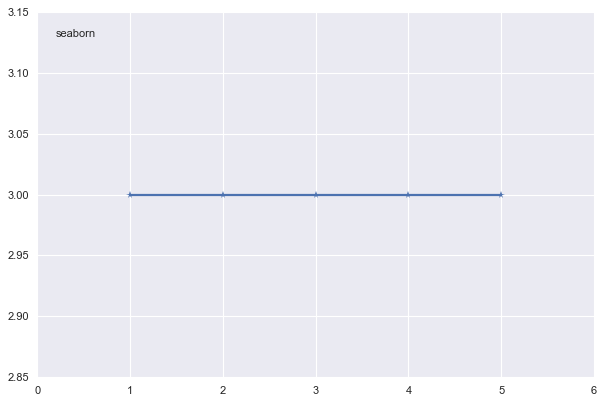

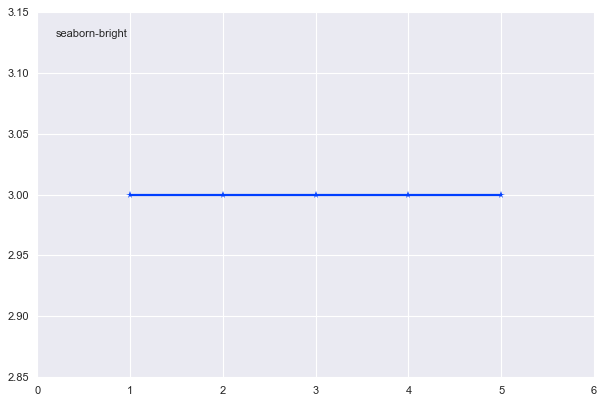

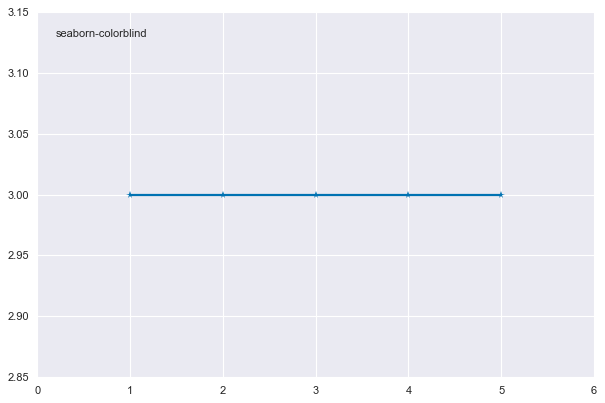

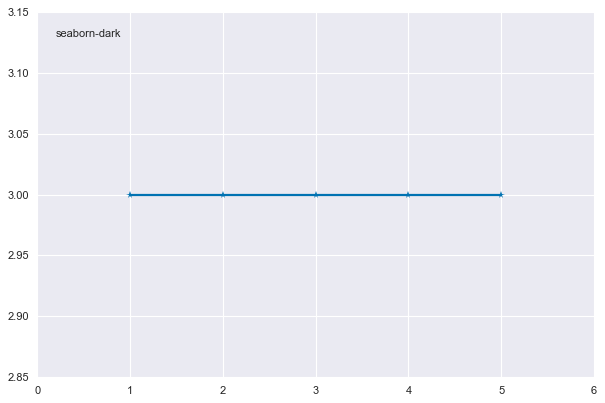

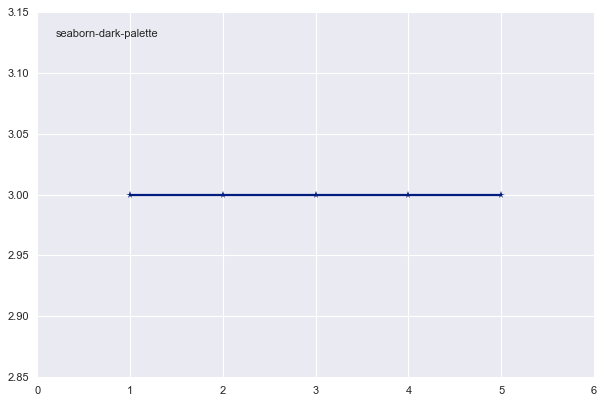

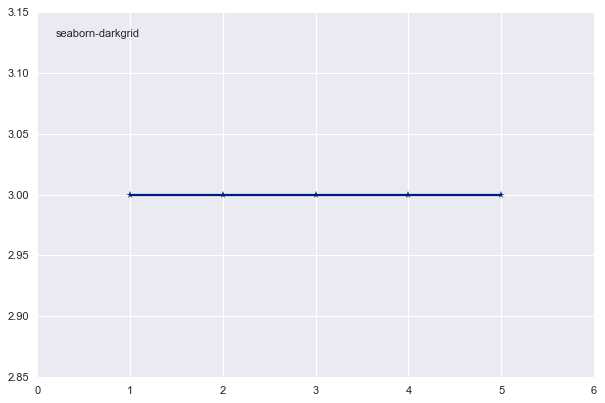

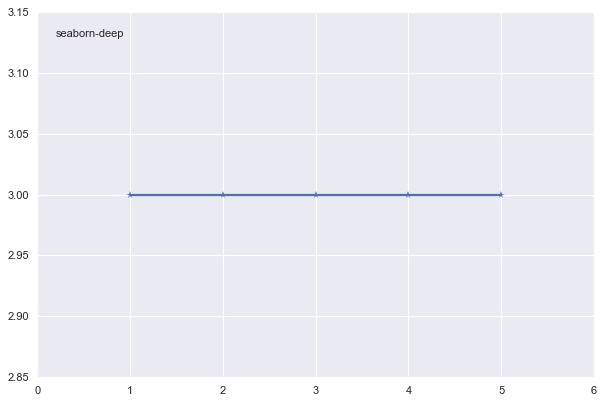

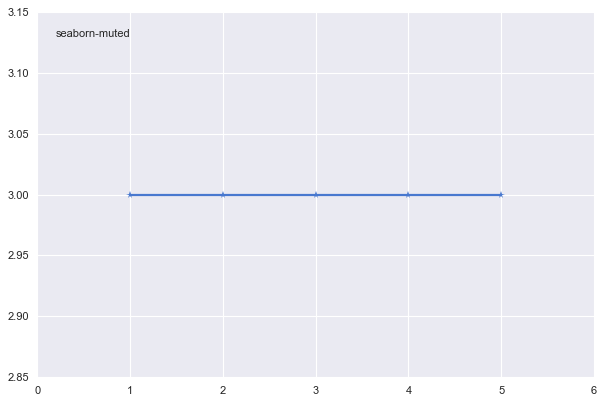

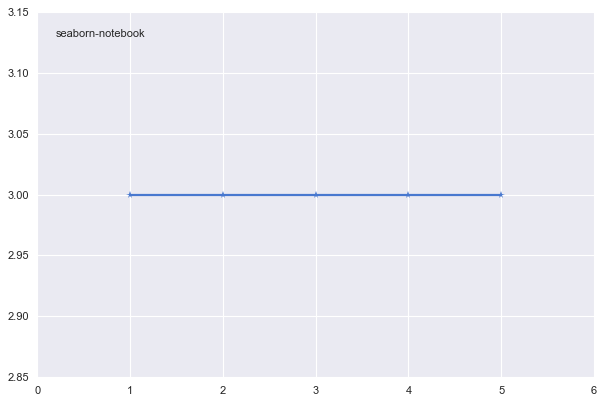

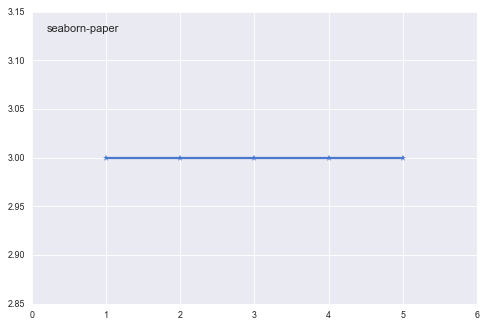

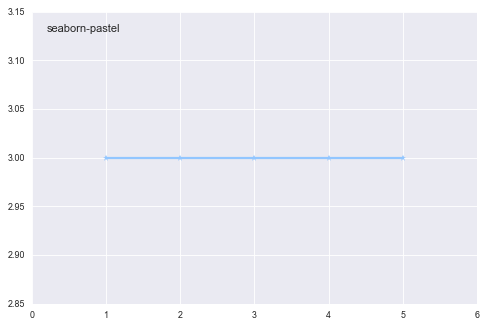

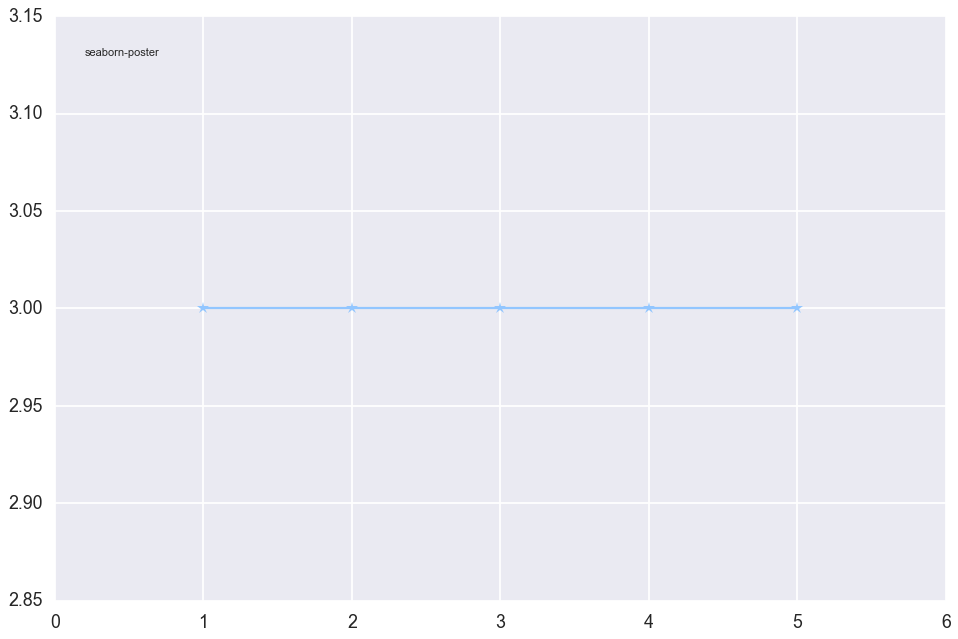

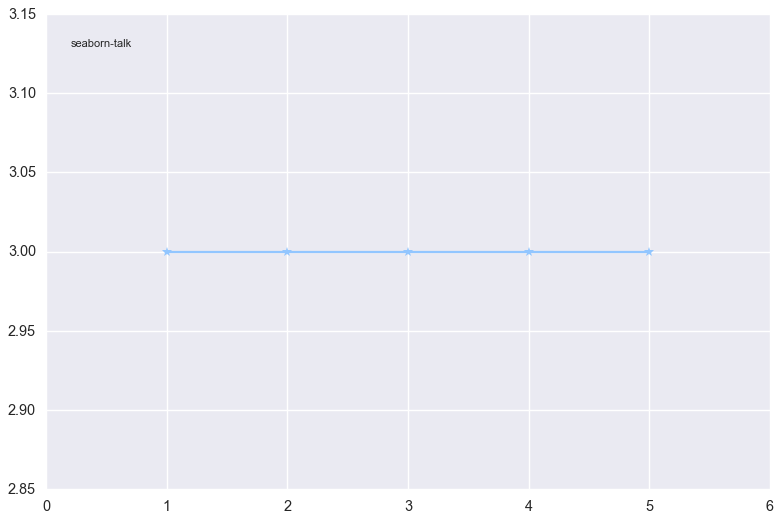

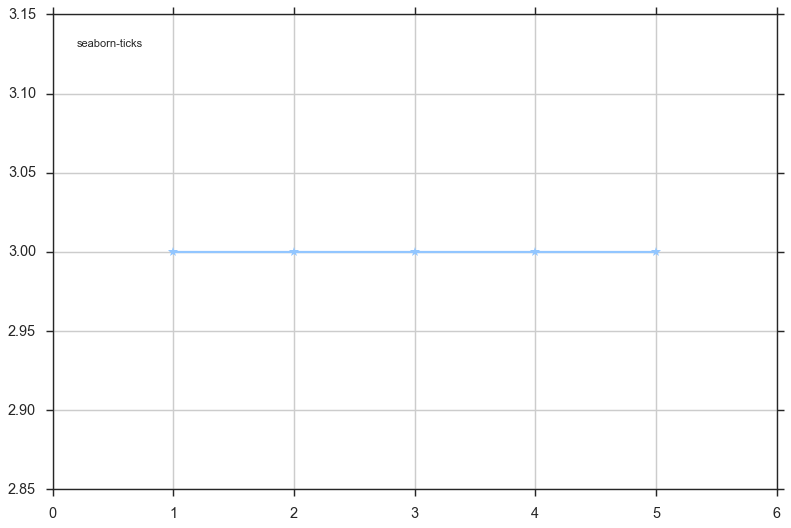

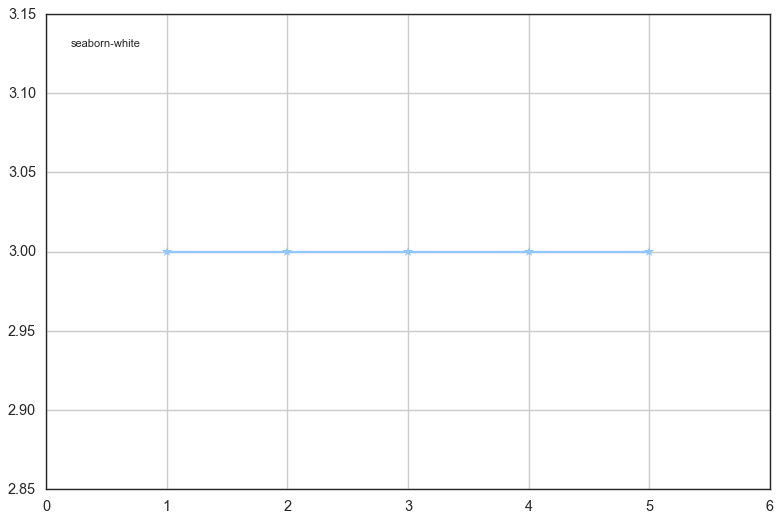

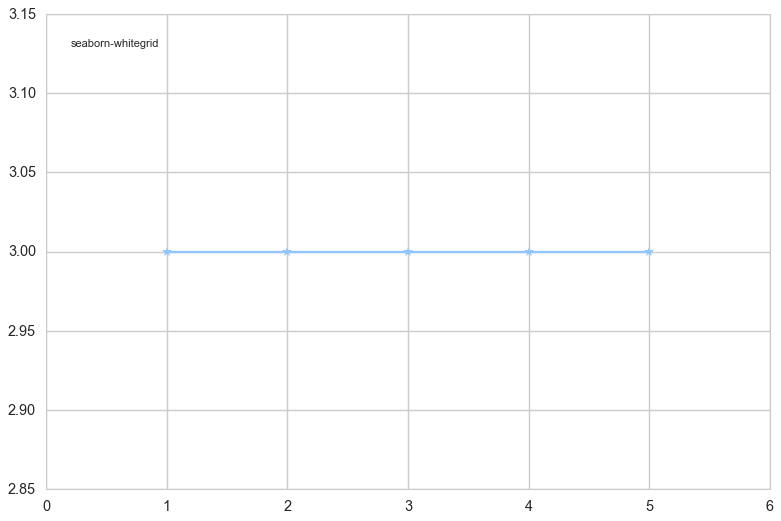

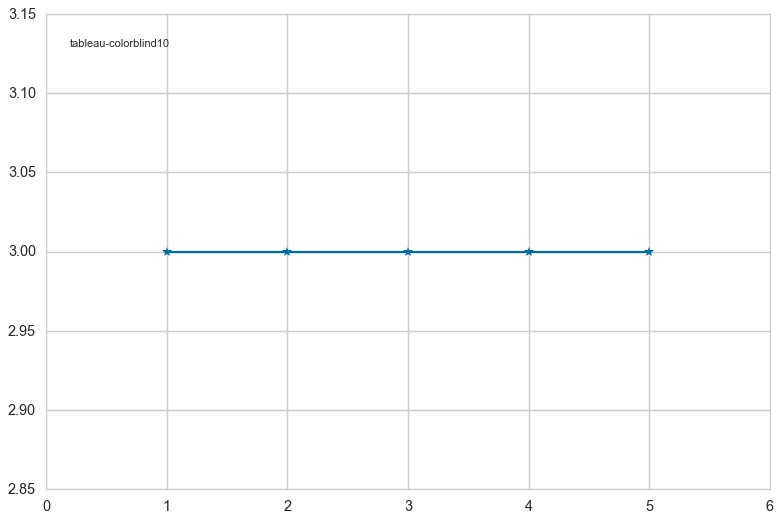

In [46]:
import seaborn as sns
x = np.linspace(1, 5, 5)
y = [3] * 5
for i in range(len(plt.style.available)):
    plt.style.use(plt.style.available[i])
    plt.grid(True)
    plt.plot(x, y, linewidth = 2, marker = "*")
    plt.xlim(0, 6)
    plt.annotate(xy = (0.2, 3.13), text = plt.style.available[i])
    plt.show()
plt.style.use("default")

## 10. 半徑為1的圓 圓心在(0, 0)
### 三種方法繪製
- ### Way1. $cos\theta + sin\theta = 1$ for 0 <= $\theta$ <= $2\pi$ 
- ### Way2. $x^2 + (\pm \sqrt{1 - x^2})^2 = 1$
- ### Way3. $直接圓函式繪製$
## 注意事項
- ### subplot(row, col, figsize)可設定子圖(列,欄,大小)
- ### ax[pos].plot pos可以選擇繪製哪裡的圖
- ### matplotlib.patches 有畫圖形的函式

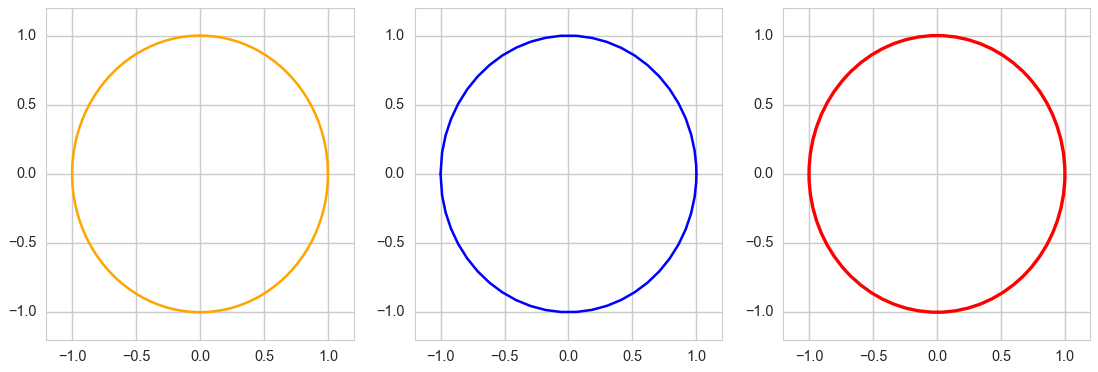

In [12]:
import matplotlib.patches as pat
plt.style.use("default")
fig, ax = plt.subplots(1, 3, figsize=(15,5))
# Way 1
p = np.linspace(0, 2 * np.pi, 100)
x = np.cos(p)
y = np.sin(p)
plt.xlim(-1.5, 1.5)
ax[0].plot(x, y, color = "orange")
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(-1.2, 1.2)

# Way 2
x = np.linspace(-1, 1, 1000)
y2 = np.sqrt(1 - np.power(x, 2)) 
y1 = - np.sqrt(1 - np.power(x, 2))
plt.xlim(-1.5, 1.5)
ax[1].plot(x, y1, color = "blue")
ax[1].plot(x, y2, color = "blue")
ax[1].set_xlim(-1.2, 1.2)
ax[1].set_ylim(-1.2, 1.2)

# Way 3
circle = plt.Circle((0, 0), 1, fill = None, color = "red", linewidth = 3)
ax[2].add_patch(circle)
ax[2].set_xlim(-1.2, 1.2)
ax[2].set_ylim(-1.2, 1.2)

plt.show()

## 11. 邊長為1的正方形 以(0, 0)為中心
- ### way1 使用套件
- ### way2 畫4條線
### 畫出不同類型的四條線
### 取消方框並增加軸

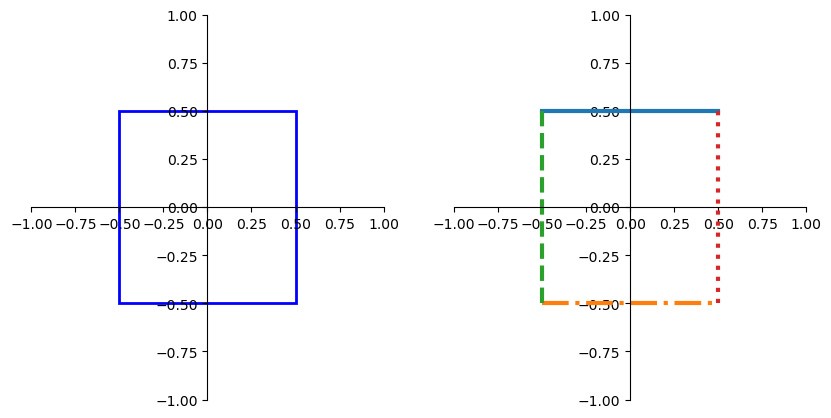

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# way1
rect = pat.Rectangle((-0.5, -0.5), 1, 1, fill=None, color="blue", linewidth=2)
ax[0].add_patch(rect)
ax[0].set_ylim(-1, 1)
ax[0].set_xlim(-1, 1)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["left"].set_position("center")
ax[0].spines["bottom"].set_position("center")
ax[0].xaxis.set_ticks_position("bottom")
ax[0].yaxis.set_ticks_position("left")
# way2
x = np.linspace(-0.5, 0.5, 1000)
y = np.linspace(-0.5, 0.5, 1000)
xy5 = [0.5] * 1000
ax[1].plot(x, xy5, linestyle="-", linewidth=3)
ax[1].plot(x, np.multiply(xy5, -1), linestyle="-.", linewidth=3)
ax[1].plot(np.multiply(xy5, -1), y, linestyle="--", linewidth=3)
ax[1].plot(xy5, y, linestyle=":", linewidth=3)
ax[1].set_ylim(-1, 1)
ax[1].set_xlim(-1, 1)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["left"].set_position("center")
ax[1].spines["bottom"].set_position("center")
ax[1].xaxis.set_ticks_position("bottom")
ax[1].yaxis.set_ticks_position("left")
plt.show()
